#### Grundbegriffe
- precision = TP/(TP+FP)
- recall = TP/(TP+FN)
- F1 (Durchschnitt aus precision und recall) = 2*(precision*recall)/(precision+recall)

#### Calculating Metrics in Scikit-learn

In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd


df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

accuracy, precision, recall und f1

In [2]:
#metric functions aus sklearn importieren
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#nimmt wahre werte des ziels heraus und und vorhergesagte werte des ziels
print('accuracy:', accuracy_score(y, y_pred)) #80% vorhersagen korrekt
print('precision:', precision_score(y, y_pred)) #78% der positiven vorhersagen korrekt
print('recall:', recall_score(y, y_pred)) #68% der fälle vom model korrekt vorhergesagt
print('f1 score', f1_score(y, y_pred)) #73% für durchschnitt aus precision und recall

accuracy: 0.8049605411499436
precision: 0.7734627831715211
recall: 0.6988304093567251
f1 score 0.7342549923195083


confusion matrix

In [3]:
#confusion matrix funktion, die die 4 werte ausgeben kann zu true positives, false poitives, true negatives, false negatives
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))
#andersherum: negativ kommt bei sklearn immer zuerst, also tatsächlich negativ/vorhersage negativ = 475, tatsächlich negativ/vorhersage positiv = 70, tat pos/vorh neg = 103, tat pos/vorh pos = 239

[[475  70]
 [103 239]]


#### Training and Testing
- 70-80% der Daten kommen ins Training Set 
- 20-30% der Daten landen im Test Set
- Beispiel: 150 datapoints training vs. 50 datapoints test
- sklearn kann Daten in Test- und Training-Set splitten (default = 75 : 25)

Training-Set erstellen

In [4]:
from sklearn.model_selection import train_test_split 

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values


X_train, X_test, y_train, y_test = train_test_split(X, y)

#training-set größe/verhältnis ändern über train_size
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

#größe der datensets anzeigen lassen über shape
print("whole dataset:", X.shape, y.shape)
print("training set:", X_train.shape, y_train.shape)
print("test set:", X_test.shape, y_test.shape)

whole dataset: (887, 6) (887,)
training set: (532, 6) (532,)
test set: (355, 6) (355,)


Trainingsset über Sklearn-Model erstellen

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

# building the model, dieses mal aber über training-set
model = LogisticRegression()
model.fit(X_train, y_train)

# evaluating the model über X_test
# alle metrics testen lassen: print("accuracy:", model.score(X_test, y_test))
#ähnlichkeiten zu echtwerten ergeben sich nur, wenn man das ganze datenset abfragt
y_pred = model.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

accuracy: 0.7882882882882883
precision: 0.7468354430379747
recall: 0.686046511627907
f1 score: 0.7151515151515152


In [6]:
#erzielt nie die gleich ergebnisse bei wiederholten durchläufen
from sklearn.model_selection import train_test_split

X2 = [[1, 1], [2, 2], [3, 3], [4, 4]]
y2 = [0, 0, 1, 1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2)
print('X_train2', X_train2)
print('X_test2', X_test2)


print('\nImmer die gleichen Durchläufe über random_state=')
#um immer den gleichen split zu kriegen (ergebnisse normal immer random): random_state= verwenden
from sklearn.model_selection import train_test_split

X2 = [[1,1], [2,2], [3,3], [4,4]]
y2 = [0,0,1,1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=27)
print('X_train2', X_train2)
print('X_test2', X_test2)

X_train2 [[2, 2], [4, 4], [1, 1]]
X_test2 [[3, 3]]

Immer die gleichen Durchläufe über random_state=
X_train2 [[3, 3], [1, 1], [4, 4]]
X_test2 [[2, 2]]


#### Foundations for the ROC Curve
- Grenze i.d.R. zwischen 0 und 1
- höhere Grenze: weniger Positive, aber dafür Vorhersagen mit höherer Wahrscheinlichkeit korrekt
- niedrigere Grenze: mehr Positive, aber Präzision dafür niedriger
- ROC Curve zeigt alle positiven Modell und ihre Werte
- sensitivity (=recall, TP rate): TP/(TP+FN)
- specificity (TN rate): TN/(TN+FP) 

Sensitivity & Specificity in Scikit-learn

In [7]:
from sklearn.metrics import recall_score

sensitivity_score = recall_score
print(f'sensivity score:', sensitivity_score(y_test, y_pred))

sensivity score: 0.686046511627907


In [8]:
from sklearn.metrics import precision_recall_fscore_support

print(f'specifity score:', precision_recall_fscore_support(y_test, y_pred))
#ergebnis: 2.array ist der recall (wert1=negative=specificity, wert2=positive=sensitivity)

specifity score: (array([0.81118881, 0.74683544]), array([0.85294118, 0.68604651]), array([0.83154122, 0.71515152]), array([136,  86], dtype=int64))


In [9]:
def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0]

print(specificity_score(y_test, y_pred))

0.8529411764705882


In [10]:
#nochmal gesamter code
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_recall_fscore_support

sensitivity_score = recall_score
def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0]

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("sensitivity:", sensitivity_score(y_test, y_pred))
print("specificity:", specificity_score(y_test, y_pred))

sensitivity: 0.6829268292682927
specificity: 0.9214285714285714


Adjusting the Logistic Regression Threshold in Sklearn

In [11]:
#wahl einer anderen grenze statt 0.5: predict_proba()-funktion
model.predict_proba(X_test)

#ergebnis: beide werte addiert ergeben 1
#linker_wert=0(gestorben), rechter wert=1(überlebt)

array([[0.46054667, 0.53945333],
       [0.88809994, 0.11190006],
       [0.13520602, 0.86479398],
       [0.6249716 , 0.3750284 ],
       [0.73722985, 0.26277015],
       [0.85687045, 0.14312955],
       [0.84133126, 0.15866874],
       [0.10657197, 0.89342803],
       [0.12609776, 0.87390224],
       [0.42023636, 0.57976364],
       [0.92436647, 0.07563353],
       [0.83523899, 0.16476101],
       [0.13698996, 0.86301004],
       [0.90217298, 0.09782702],
       [0.60512299, 0.39487701],
       [0.79564747, 0.20435253],
       [0.17515531, 0.82484469],
       [0.46654899, 0.53345101],
       [0.24196022, 0.75803978],
       [0.89247698, 0.10752302],
       [0.28467585, 0.71532415],
       [0.87814606, 0.12185394],
       [0.86200163, 0.13799837],
       [0.87075261, 0.12924739],
       [0.86658841, 0.13341159],
       [0.22589812, 0.77410188],
       [0.85172027, 0.14827973],
       [0.8516764 , 0.1483236 ],
       [0.56230304, 0.43769696],
       [0.64036605, 0.35963395],
       [0.

In [12]:
#grenze bei 75% definieren:
y_pred = model.predict_proba(X_test)[:,1] > 0.75

#ergebnis: weniger pos, aber mehr neg (man muss sich schon mehrerer pos-werte bewusst sein)

In [13]:
#prediction durchführen über precision und recall
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))

precision: 0.9230769230769231
recall: 0.43902439024390244


In [14]:
#gesamter beispielcode:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:, 1] > 0.75

print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))

precision: 0.8723404255319149
recall: 0.4823529411764706


#### The ROC Curve
- ROC ist Graph bestehend aus Werten von "specificity" und "sensitivity"
- Vorgehen: Logistic Regression Model -> Kalkulation von specificity und sensitivity
- jede vorhergesagte Wahrscheinlichkeit wird als "Grenze" verwendet
- specificity: FP rate auf x-Achse
- sensitivity: TP rate auf y-Achse

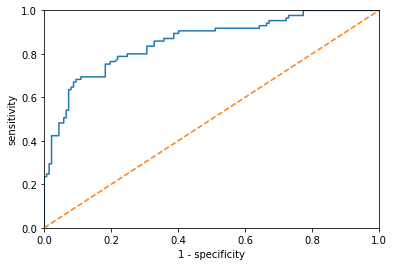

In [28]:
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:,1]) #fp/tp

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') #linie als richtlinie, wie weit das modell von den zufalls-werten entfernt ist
plt.xlim([0.0, 1.0]) #höchstwert der x-achse
plt.ylim([0.0, 1.0]) #höchstwert der y-achse
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

#roc curve interpretation: kurve sollte nie unter linie fallen
#je nachdem was eher gebraucht wird, modell(punkt auf random-kurve) nach specificity oder sensitivity wählen

Bereich unter Kurve berechnen lassen

In [31]:
metrics.roc_auc_score(y_test, y_pred_proba[:,1]) #auch = area under curve

0.8556032632030915

Beispiel

In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_proba1 = model1.predict_proba(X_test)
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba1[:, 1]))

model2 = LogisticRegression()
model2.fit(X_train[:, 0:2], y_train)
y_pred_proba2 = model2.predict_proba(X_test[:, 0:2])
print("model 2 AUC score:", roc_auc_score(y_test, y_pred_proba2[:, 1]))

model 1 AUC score: 0.8741724738675959
model 2 AUC score: 0.8352787456445991


#### k-fold Cross Validation
- Set aufteilen in z.B. 5 Teilsets
- Bsp.: 100 Daten -> 4x 20 Train Data + 1x 20 Test Data
- Ziel: genaue Messungen erhalten für Maße (accuracy, precision, recall) durch das Erstellen von extra Modellen => um sicher zu sein, dass die Ergebnisse auch zuverlässig sind bzw. stimmen sollten
- bei sehr großen Daten: splitten sinnvoll wegen Rechenleistung
- nach 5er-split k-fold CV: neues Modell aus den ganzen Daten zusammenbauen

Bisheriger Code aus Lektion 3

In [14]:
#berechnet dauer für codedurchlauf
import time
start = time.time()

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

# building the model
model = LogisticRegression()
model.fit(X_train, y_train)

# evaluating the model
y_pred = model.predict(X_test)
print(" accuracy: {0:.5f}".format(accuracy_score(y_test, y_pred)))
print("precision: {0:.5f}".format(precision_score(y_test, y_pred)))
print("   recall: {0:.5f}".format(recall_score(y_test, y_pred)))
print(" f1 score: {0:.5f}".format(f1_score(y_test, y_pred)))

#Ergebnis: output variiert aktuell noch ziemlich stark zwischen acc(0.79-0.84), prec(0.75-0.81), recall(0.63-0.75)

end = time.time()
print(f'{abs(start-end)}s')

 accuracy: 0.77477
precision: 0.75000
   recall: 0.66667
 f1 score: 0.70588
0.30110883712768555s


#### k-fold Cross Validation in Sklearn = Praktische Umsetzung k-fold CV

KFold Class

In [41]:
from sklearn.model_selection import KFold
import pandas as pd

#datenset mit nur 6 datenpunkten und 2 features über k-fold cv
#erste 6 reihen aus titanic
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
X = df[['Age', 'Fare']].values[:6]
y = df['Survived'].values[:6]

#k-fold klasse initiieren mit k als anzahl der daten-container (chunks)
#shuffle=True sorgt für zufallsordnung der datenauswahl
kf = KFold(n_splits=3, shuffle=True)

#einteilung in listen noch nötig, da gesplittet wird
for train, test in kf.split(X):
    print(train, test)
    
#print(list(kf.split(X))) #als listen nacheinander

#ergebnis: 3 training-sets und 3 test-sets (achtung: werte können nicht jeweils doppelt vorkommen)

[0 1 2 5] [3 4]
[1 2 3 4] [0 5]
[0 3 4 5] [1 2]


Trainings- und Test-Sets über die Folds erstellen

In [30]:
#ersten split ausgeben
splits = list(kf.split(X))
first_split = splits[0]
print(first_split)

(array([0, 3, 4, 5]), array([1, 2]))


In [36]:
#zwischen trainings-set und test-set unterscheiden
train_indices, test_indices = first_split
print("training set indices:", train_indices)
print("test set indices:", test_indices)

training set indices: [0 3 4 5]
test set indices: [1 2]


In [37]:
#X und y train/test über indizes erzeugen
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

In [40]:
print("X_train")
print(X_train)
print("y_train", y_train)
print("X_test")
print(X_test)
print("y_test", y_test)

#ergebnis: 4 der datenpunkte in x_train und ihre ziel-werte in y_train => restliche 2 datenpunkte in x_test und ihre ziel-werte in y_test

X_train
[[22.      7.25  ]
 [35.     53.1   ]
 [35.      8.05  ]
 [27.      8.4583]]
y_train [0 1 0 0]
X_test
[[38.     71.2833]
 [26.      7.925 ]]
y_test [1 1]


Das Modell aufbauen

In [42]:
#ganzes datenset wird verwendet (nur so aussagekräftig genug)
#modell wird verwendet für vorhersage
#k-fold cv mit k=5  

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import pandas as pd

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

kf = KFold(n_splits=5, shuffle=True)

splits = list(kf.split(X))
train_indices, test_indices = splits[0]
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7696629213483146


Alle Folds ausgeben lassen (= iterieren)

In [52]:
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

#iterieren, um alle werte zu kriegen, nicht wie zuvor nur 1 wert
scores = []

kf = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print(f'loop over folds:', scores)

print(f'final score calculated by mean:', np.mean(scores))

#ergebnis: nach jeder code-ausführung anders => durchschnitt weicht aber kaum ab 

loop over folds: [0.8314606741573034, 0.7865168539325843, 0.7853107344632768, 0.807909604519774, 0.768361581920904]
final score calculated by mean: 0.7959118897987685


#### Modell-Vergleich
- Beispiel: Vergleich ganzes_Datenset vs. Pclass_Age_Sex vs. Fare_Age
- Evalluierungs-Techniken nötig, um zwischen mehreren Modell-Optionen zu unterscheiden

Modelle über Scikit-learn aufbauen

In [74]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

#vorbereitung der daten
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'

#k-fold objekt ersetllen
kf = KFold(n_splits=5, shuffle=True)

#3 feature matrizen erstellen, alle mit dem gleichen ziel y
X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X2 = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare', 'Age']].values
y = df['Survived'].values

#verwendung des k-fold objekts um accuracy/precision/recall/f1 zu berechnen
def score_model(X, y, kf):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy_scores))
    print("precision:", np.mean(precision_scores))
    print("recall:", np.mean(recall_scores))
    print("f1 score:", np.mean(f1_scores))

print("Logistic Regression with all features")
score_model(X1, y, kf)
print()
print("Logistic Regression with Pclass, Sex & Age features")
score_model(X2, y, kf)
print()
print("Logistic Regression with Fare & Age features")
score_model(X3, y, kf)

#ergebnis: erste beide modelle mit ähnlichen ergebnissen, beim 3.modell fehlt
#das geschlecht => aussage: frauen überleben häufiger =>
#=> einfacheres modell wählen (da sowieso ähnlich dem 1.modell)
#=> modell2(X2) ist die beste wahl

#final model erstellen
model = LogisticRegression()
print(model.fit(X1, y))

#vorhersage erstellen
print(model.predict([[3, False, 25, 0, 1, 2]]))

Logistic Regression with all features
accuracy: 0.8004380118072749
precision: 0.7651492951492951
recall: 0.6970200725511578
f1 score: 0.7282691107630734

Logistic Regression with Pclass, Sex & Age features
accuracy: 0.7970799212848346
precision: 0.7524251452995642
recall: 0.7101586025725499
f1 score: 0.7281690375202344

Logistic Regression with Fare & Age features
accuracy: 0.658414270297721
precision: 0.6561639578692627
recall: 0.24885830999066294
f1 score: 0.35559417971461543
LogisticRegression()
[1]
